In [53]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [42]:
pokemon = pd.read_csv('pokemon.csv')
pokemon

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,...,Red,False,NaN,Undiscovered,NaN,False,5.79,203.0,45,two_wings
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,...,Green,False,NaN,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,...,Purple,False,NaN,Undiscovered,NaN,False,0.51,9.0,3,head_only


# Preprocessing
## Encodage des valeurs qualitatives en quantitatives

In [43]:
# Encodage ordinal
encoder = LabelEncoder()

# Encodage récursif sur toutes les colonnes du Dataframe
for i in range(0, len(pokemon.columns)):
    if(pokemon.iloc[:,i].dtype != 'int64' or 'float64'):
        encoder = LabelEncoder()
        pokemon.iloc[:,i] = encoder.fit_transform(pokemon.iloc[:,i])

In [44]:
pokemon

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,0,67,9,13,57,17,24,23,41,37,...,3,1,5,10,6,0,6,49,5,9
1,1,294,9,13,94,31,37,37,55,50,...,3,1,5,10,6,0,10,88,5,9
2,2,669,9,13,165,51,56,55,70,66,...,3,1,5,10,6,1,20,311,5,9
3,3,86,6,18,51,11,27,18,36,22,...,7,1,5,10,2,0,5,63,5,0
4,4,87,6,18,94,29,39,32,55,37,...,7,1,5,10,2,0,11,113,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,716,710,1,7,181,82,92,64,89,64,...,7,0,7,11,13,0,42,360,5,12
717,717,720,2,10,178,72,72,80,56,62,...,3,0,7,11,13,0,39,378,0,10
718,718,140,15,4,178,21,72,90,70,86,...,5,0,7,11,13,1,6,66,0,3
719,719,281,14,8,178,51,81,34,92,82,...,6,0,7,11,13,0,4,67,0,6


## Normalisation

In [289]:
for i in range(0, len(pokemon.columns)):
    scaler = MinMaxScaler()
    X = pokemon.iloc[:,i]
    X = np.array(X.values.tolist())
    X = X.reshape(-1, 1)
    pokemon.iloc[:,i] = scaler.fit_transform(X)

In [290]:
pokemon

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,0.000000,0.093056,0.529412,0.722222,0.313187,0.182796,0.242424,0.239583,0.440860,0.415730,...,0.333333,1.0,0.714286,0.714286,0.461538,0.0,0.122449,0.123426,0.15625,0.692308
1,0.001389,0.408333,0.529412,0.722222,0.516484,0.333333,0.373737,0.385417,0.591398,0.561798,...,0.333333,1.0,0.714286,0.714286,0.461538,0.0,0.204082,0.221662,0.15625,0.692308
2,0.002778,0.929167,0.529412,0.722222,0.906593,0.548387,0.565657,0.572917,0.752688,0.741573,...,0.333333,1.0,0.714286,0.714286,0.461538,1.0,0.408163,0.783375,0.15625,0.692308
3,0.004167,0.119444,0.352941,1.000000,0.280220,0.118280,0.272727,0.187500,0.387097,0.247191,...,0.777778,1.0,0.714286,0.714286,0.153846,0.0,0.102041,0.158690,0.15625,0.000000
4,0.005556,0.120833,0.352941,1.000000,0.516484,0.311828,0.393939,0.333333,0.591398,0.415730,...,0.777778,1.0,0.714286,0.714286,0.153846,0.0,0.224490,0.284635,0.15625,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,0.994444,0.986111,0.058824,0.388889,0.994505,0.881720,0.929293,0.666667,0.956989,0.719101,...,0.777778,0.0,1.000000,0.785714,1.000000,0.0,0.857143,0.906801,0.15625,0.923077
717,0.995833,1.000000,0.117647,0.555556,0.978022,0.774194,0.727273,0.833333,0.602151,0.696629,...,0.333333,0.0,1.000000,0.785714,1.000000,0.0,0.795918,0.952141,0.00000,0.769231
718,0.997222,0.194444,0.882353,0.222222,0.978022,0.225806,0.727273,0.937500,0.752688,0.966292,...,0.555556,0.0,1.000000,0.785714,1.000000,1.0,0.122449,0.166247,0.00000,0.230769
719,0.998611,0.390278,0.823529,0.444444,0.978022,0.548387,0.818182,0.354167,0.989247,0.921348,...,0.666667,0.0,1.000000,0.785714,1.000000,0.0,0.081633,0.168766,0.00000,0.461538


# Modèle KNN Classifier

In [49]:
## Séparation du dataset pour l'entrainement et le test du modèle

In [45]:
y = pokemon['isLegendary']
X = pokemon.drop('isLegendary', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

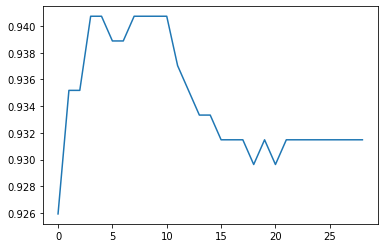

In [52]:
score = []

for k in range(1, 30):
    val_score = cross_val_score(KNeighborsClassifier(k), X_train, y_train).mean()
    score.append(val_score)
    
plt.plot(score)

In [47]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)
score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)
print("Le score sur le jeu d'entrainement est de :" + str(score_train))
print("Le score sur le jeu de test est de :" + str(score_test))


Le score sur le jeu d'entrainement est de :0.9388888888888889
Le score sur le jeu de test est de :0.9502762430939227


# LinearRegression

<AxesSubplot:>

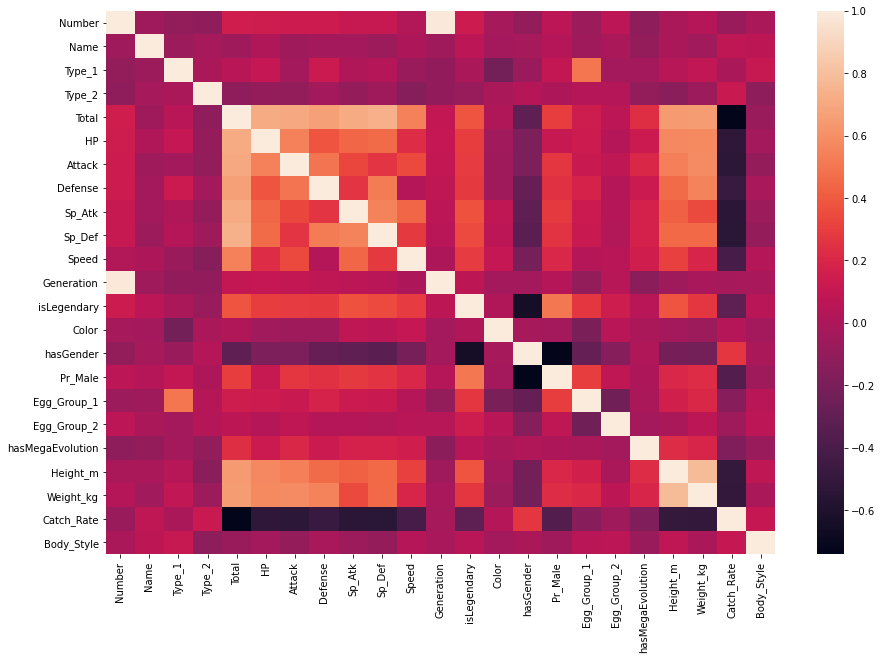

In [362]:
# Corrélation entre les features
plt.subplots(figsize=(15,10))
sns.heatmap(pokemon.corr())

## Séparation du dataset pour l'entrainement et le test du modèle

In [357]:
X = pokemon['Weight_kg']
y = pokemon['Height_m']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

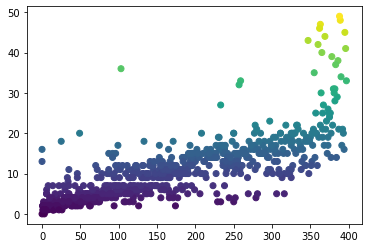

In [358]:
X_train = pokemon['Weight_kg']
y_train = pokemon['Height_m']

plt.scatter(X, y, c=y)

Le score sur le jeu d'entrainement est de :0.6029418435805605
Le score sur le jeu de test est de :0.654589010536995


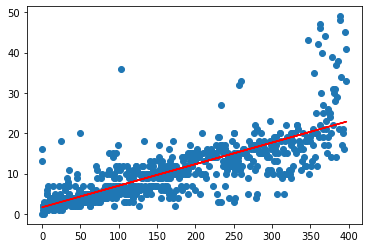

In [359]:
model = LinearRegression()

# Convert to numpy array 2D
X_train = np.array(X_train.values.tolist())
X_train = X_train.reshape(-1, 1)
y_train = np.array(y_train.values.tolist())
y_train = y_train.reshape(-1, 1)

X_test = np.array(X_test.values.tolist())
X_test = X_test.reshape(-1, 1)
y_test = np.array(y_test.values.tolist())
y_test = y_test.reshape(-1, 1)

model.fit(X_train, y_train)
score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)

print("Le score sur le jeu d'entrainement est de :" + str(score_train))
print("Le score sur le jeu de test est de :" + str(score_test))

predictions = model.predict(X_train)

plt.scatter(X_train, y_train)
plt.plot(X_train, predictions, c='r')

In [54]:
model = RandomForestRegressor(n_estimators=250, random_state=123)
model.fit(X_train, y_train)
predict = model.predict(X_test)
print(np.sum(predict == y_test)/X_test.shape[0])

0.9005524861878453


# RandomForestClassifier

In [360]:
X = pokemon.drop('Generation', axis=1)
y = pokemon['Generation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [361]:
model = RandomForestClassifier(n_estimators=250, random_state=123)
model.fit(X_train, y_train)
predict = model.predict(X_test)
print(np.sum(predict == y_test)/X_test.shape[0])

0.9834254143646409
